<a href="https://colab.research.google.com/github/Poorya0071/Image-classification/blob/main/fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruit Classification

In [3]:
import tensorflow_datasets.public_api as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("fruit.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [5]:
train_dir = "/content/train/train"
test_dir = "/content/test"

In [6]:

import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk(train_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 33 directories and 0 images in '/content/train/train'.
There are 0 directories and 427 images in '/content/train/train/Avocado'.
There are 0 directories and 492 images in '/content/train/train/Lemon'.
There are 0 directories and 492 images in '/content/train/train/Cantaloupe'.
There are 0 directories and 490 images in '/content/train/train/Limes'.
There are 0 directories and 490 images in '/content/train/train/Passion Fruit'.
There are 0 directories and 492 images in '/content/train/train/Apple Granny Smith'.
There are 0 directories and 492 images in '/content/train/train/Strawberry'.
There are 0 directories and 492 images in '/content/train/train/Apricot'.
There are 0 directories and 738 images in '/content/train/train/Tomato'.
There are 0 directories and 492 images in '/content/train/train/Cherry'.
There are 0 directories and 666 images in '/content/train/train/Pepper Red'.
There are 0 directories and 984 images in '/content/train/train/Grape Blue'.
There are 0 directories 

In [7]:

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk(test_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in '/content/test'.
There are 0 directories and 5641 images in '/content/test/test'.


In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/train/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)
print(len(class_names))

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']
33


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [19]:
IDG = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True,
                                             validation_split = 0.2) # flip the image on the horizontal axis
 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [20]:
print("Augmented training images:")
train_data_augmented = IDG.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                               subset = 'training', # for multicalss change to categorical
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle



print("Unchanged test images:")
test_data = IDG.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                               subset = 'validation', # for multicalss change to categorical
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

Augmented training images:
Found 13493 images belonging to 33 classes.
Unchanged test images:
Found 3361 images belonging to 33 classes.


In [21]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(33, activation="softmax") # binary activation output
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)//10)
  

Epoch 1/5
422/422 [==============================] - 140s 331ms/step - loss: 1.0881 - accuracy: 0.6789 - val_loss: 0.4261 - val_accuracy: 0.8438
Epoch 2/5
422/422 [==============================] - 140s 331ms/step - loss: 0.3083 - accuracy: 0.8982 - val_loss: 0.2389 - val_accuracy: 0.9250
Epoch 3/5
422/422 [==============================] - 139s 328ms/step - loss: 0.2275 - accuracy: 0.9231 - val_loss: 0.2007 - val_accuracy: 0.9344
Epoch 4/5
422/422 [==============================] - 140s 331ms/step - loss: 0.1920 - accuracy: 0.9357 - val_loss: 0.3757 - val_accuracy: 0.8844
Epoch 5/5
422/422 [==============================] - 139s 330ms/step - loss: 0.1681 - accuracy: 0.9429 - val_loss: 0.2301 - val_accuracy: 0.9219


In [22]:
model_1.evaluate(test_data)

106/106 [==============================] - 33s 313ms/step - loss: 0.2465 - accuracy: 0.9137


[0.24645169079303741, 0.9137161374092102]

In [23]:
import tensorflow_hub as hub

In [24]:
resnet_v2_50 = "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5"
def create_model(model_url, num_classes=10):
  
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(224,224,3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

In [27]:
model = create_model(resnet_v2_50, num_classes=33)

# Compile
model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
model.fit(train_data_augmented,
                        epochs=4,
                        steps_per_epoch=len(train_data_augmented)//10,
                        validation_data=test_data,
                        validation_steps=len(test_data)//10)

Epoch 1/4
42/42 [==============================] - 22s 458ms/step - loss: 1.8852 - accuracy: 0.5312 - val_loss: 0.4784 - val_accuracy: 0.8656
Epoch 2/4
42/42 [==============================] - 18s 437ms/step - loss: 0.3531 - accuracy: 0.9092 - val_loss: 0.1943 - val_accuracy: 0.9656
Epoch 3/4
42/42 [==============================] - 18s 436ms/step - loss: 0.1679 - accuracy: 0.9546 - val_loss: 0.1417 - val_accuracy: 0.9812
Epoch 4/4
42/42 [==============================] - 22s 531ms/step - loss: 0.1337 - accuracy: 0.9700 - val_loss: 0.1007 - val_accuracy: 0.9781


In [28]:
model.evaluate(test_data)

106/106 [==============================] - 53s 496ms/step - loss: 0.1106 - accuracy: 0.9747


[0.11055658757686615, 0.9747099280357361]

In [29]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [30]:

# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 26ms/step


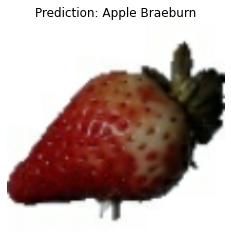

In [61]:
pred_and_plot(model_1,'/content/test/test/0191.jpg',class_names )

1/1 [==============================] - 0s 16ms/step


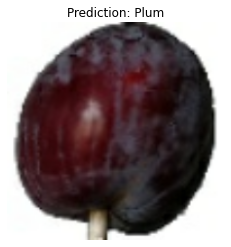

In [65]:
pred_and_plot(model_1,'/content/test/test/0491.jpg',class_names )

1/1 [==============================] - 0s 20ms/step


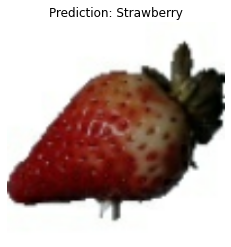

In [57]:
pred_and_plot(model,'/content/test/test/0191.jpg',class_names )

1/1 [==============================] - 0s 40ms/step


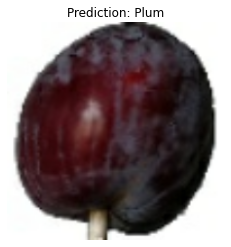

In [64]:
pred_and_plot(model,'/content/test/test/0491.jpg',class_names )

Transfer learning works better